In [1]:
import pandas as pd

In [20]:
white_stats = pd.read_csv('../data/white_stats.csv', index_col=0)
params_df = pd.read_csv('../data/processed_df2.csv', index_col=0)
negative_df = pd.read_csv('../text_model//negative_df.csv', index_col=0)

In [40]:
params_df

(907, 121)

In [5]:
white_stats.shape

(1116932, 4)

In [24]:
white_stats['patient_id'] = white_stats['0'].apply(lambda x: '-'.join(x.replace('/mnt/d/uczelnia/magister/TCGA_breast_patch/', '').split('-')[0:3]))

In [35]:
import os
ids = set(['-'.join(d.split('-')[0:3]) for d in os.listdir('../data/TCGA_breast_patch/')[1:]])

In [37]:
negative_df.loc[negative_df.index.isin(ids), '']

102

In [18]:
white_stats.iloc[0,0]

'/mnt/d/uczelnia/magister/TCGA_breast_patch/TCGA-3C-AAAU-01A-01-T_R1/patch_10_1.png'

In [27]:
white_stats.head()

,0,1,2,3,patient_id
0,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.999701,50161,50176,TCGA-3C-AAAU
1,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000000,0,50176,TCGA-3C-AAAU
2,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000020,1,50176,TCGA-3C-AAAU
3,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000000,0,50176,TCGA-3C-AAAU
4,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000060,3,50176,TCGA-3C-AAAU


In [28]:
df = white_stats.join(params_df['SUBTYPE'], 'patient_id', how='inner')
df.rename(columns={'0': 'path', '1': 'percentage'}, inplace=True)

In [29]:
df.head()

,path,percentage,2,3,patient_id,SUBTYPE
1502,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,HER2+
1503,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00002,1,50176,TCGA-3C-AALI,HER2+
1504,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,HER2+
1505,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,HER2+
1506,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,HER2+


In [30]:
df['path'] = df['path'].apply(lambda x: x.replace('/mnt/d/uczelnia/magister', '../data'))

In [31]:
filtered_df = df[df['percentage'] <= 0.2]

<AxesSubplot:>

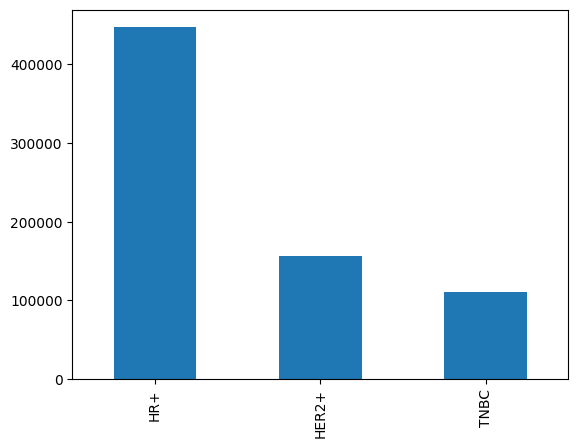

In [32]:
filtered_df['SUBTYPE'].value_counts().plot.bar()

In [33]:
filtered_df.rename(columns={'path': 'file_name', 'SUBTYPE': 'label'})[['file_name', 'label']].to_csv('../data/TCGA_breast_patch/metadata.csv')